In [15]:
#Victor de Lima Souza
#199335

In [16]:
import pandas as pd
from plotnine import *

diamonds = pd.read_csv("diamonds.csv.gz", compression="gzip")

diamonds.info()
diamonds.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


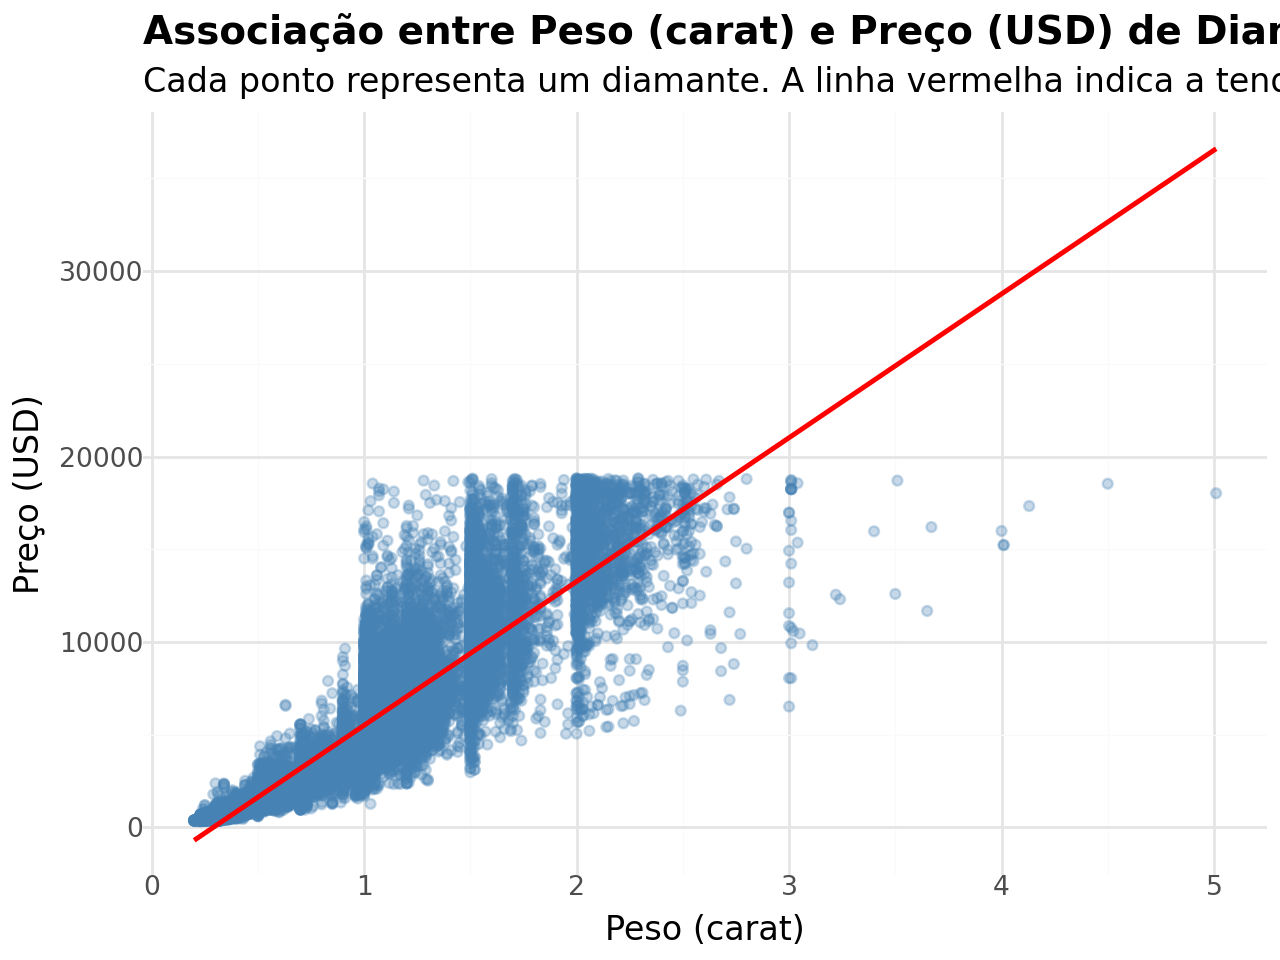

In [17]:
(
    ggplot(diamonds, aes(x='carat', y='price')) +
    geom_point(alpha=0.3, color='steelblue') +
    geom_smooth(method='lm', color='red') +
    labs(
        title='Associação entre Peso (carat) e Preço (USD) de Diamantes',
        subtitle='Cada ponto representa um diamante. A linha vermelha indica a tendência linear.',
        x='Peso (carat)',
        y='Preço (USD)'
    ) +
    theme_minimal(base_size=12) +
    theme(
        plot_title=element_text(weight='bold', size=14),
        axis_text_x=element_text(rotation=0)
    )
)


In [18]:
#Para garantir a qualidade do gráfico, utilizou-se transparência para reduzir a sobreposição de pontos, uma linha de tendência para evidenciar a relação entre peso e preço, e o tema minimalista para eliminar distrações visuais. Além disso, foram adicionados rótulos claros e escalas com unidades adequadas, assegurando uma apresentação precisa e de fácil interpretação.

In [19]:
#O gráfico revela uma forte associação positiva entre o peso (carat) e o preço dos diamantes. Observa-se que, à medida que o peso aumenta, o preço cresce de forma acentuada, mas não linear, indicando que diamantes maiores têm um preço proporcionalmente muito mais alto. A linha de tendência confirma essa correlação positiva. Além disso, a dispersão é mais ampla em diamantes com maior caratagem, sugerindo que outros fatores, como qualidade de corte, cor e clareza, também influenciam significativamente o preço.

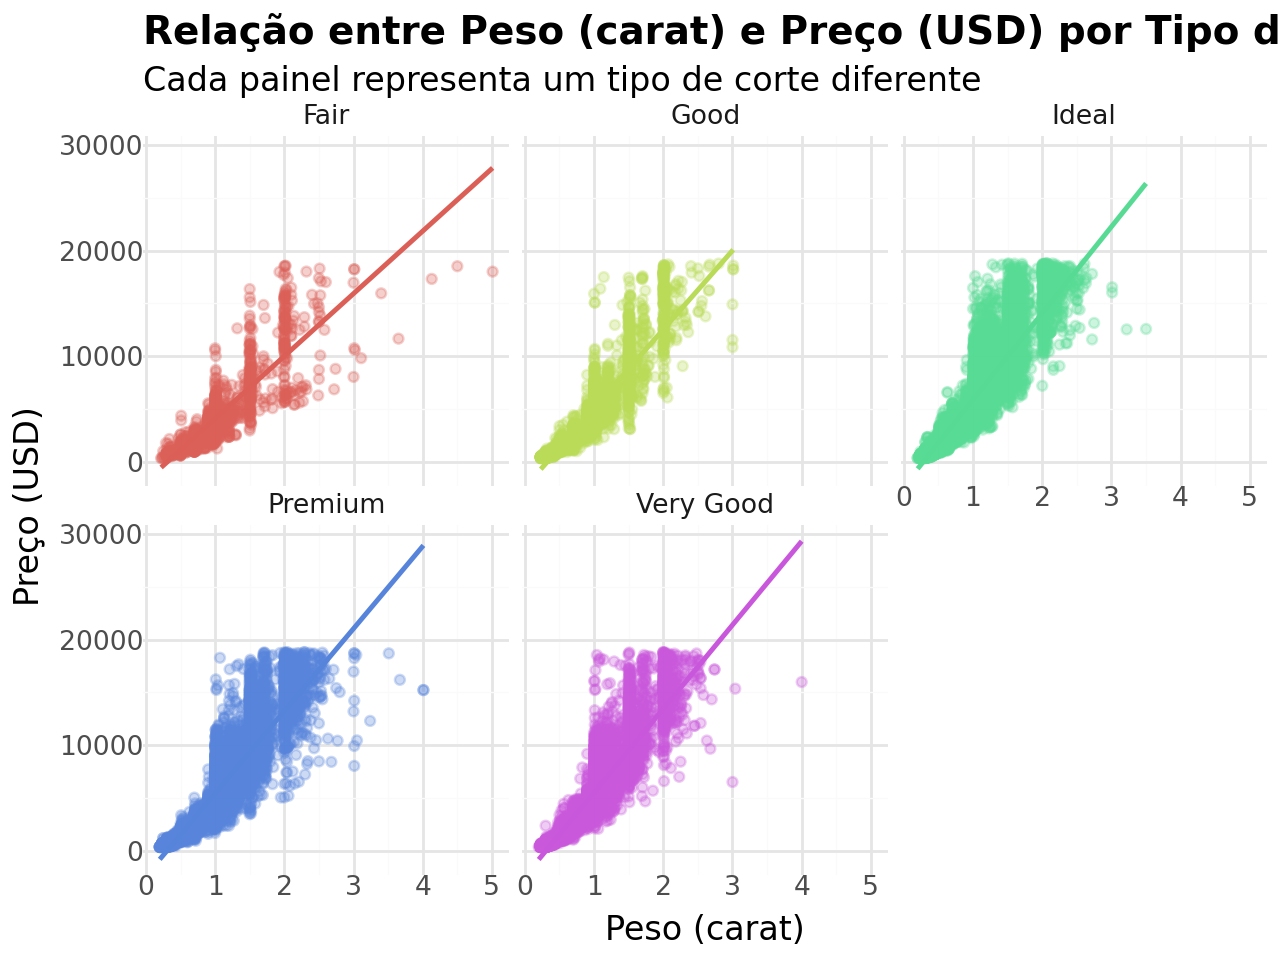

In [20]:
(
    ggplot(diamonds, aes(x='carat', y='price', color='cut')) +
    geom_point(alpha=0.3) +
    geom_smooth(method='lm', se=False) +
    facet_wrap('~cut') +
    labs(
        title='Relação entre Peso (carat) e Preço (USD) por Tipo de Corte',
        subtitle='Cada painel representa um tipo de corte diferente',
        x='Peso (carat)',
        y='Preço (USD)'
    ) +
    theme_minimal(base_size=12) +
    theme(
        plot_title=element_text(weight='bold', size=14),
        legend_position='none'
    )
)


In [21]:
diamonds['faixa_carat'] = pd.cut(
    diamonds['carat'],
    bins=[0, 0.5, 1, 2, 3, 5],
    labels=['≤0.5', '0.5–1', '1–2', '2–3', '>3']
)

mean_price = (
    diamonds
    .groupby(['cut', 'faixa_carat'], as_index=False)['price']
    .mean()
    .rename(columns={'price': 'preco_medio'})
)

mean_price.head()

/tmp/ipython-input-3637672398.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,cut,faixa_carat,preco_medio
0,Fair,≤0.5,1027.979275
1,Fair,0.5–1,2802.109661
2,Fair,1–2,6127.426966
3,Fair,2–3,11697.037383
4,Fair,>3,14570.777778


In [22]:
#Para aprimorar a visualização, foram utilizadas facetas para comparar a relação entre peso e preço em diferentes categorias, transparência para melhorar a legibilidade em áreas densas e cores distintas para destacar os tipos de corte. O tema limpo e os títulos claros facilitaram o foco na relação principal, enquanto a linha de tendência evidenciou o padrão de associação dentro de cada grupo.

In [23]:
#A análise facetada mostra que, em todos os tipos de corte, a relação entre peso (carat) e preço (price) permanece positiva, ou seja, diamantes mais pesados continuam sendo mais caros. No entanto, a intensidade da relação varia. Cortes de qualidade superior, como Ideal e Premium, tendem a apresentar preços mais altos para o mesmo peso, indicando que o tipo de corte influencia significativamente o valor de mercado. Já cortes inferiores (Fair e Good) mostram uma relação mais dispersa e preços mais baixos em média. Assim, embora o peso seja um forte preditor de preço, o tipo de corte modifica o nível e a consistência dessa relação.

/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.12/dist-packages/plotnine/stats/stat_smooth.py:215: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sur

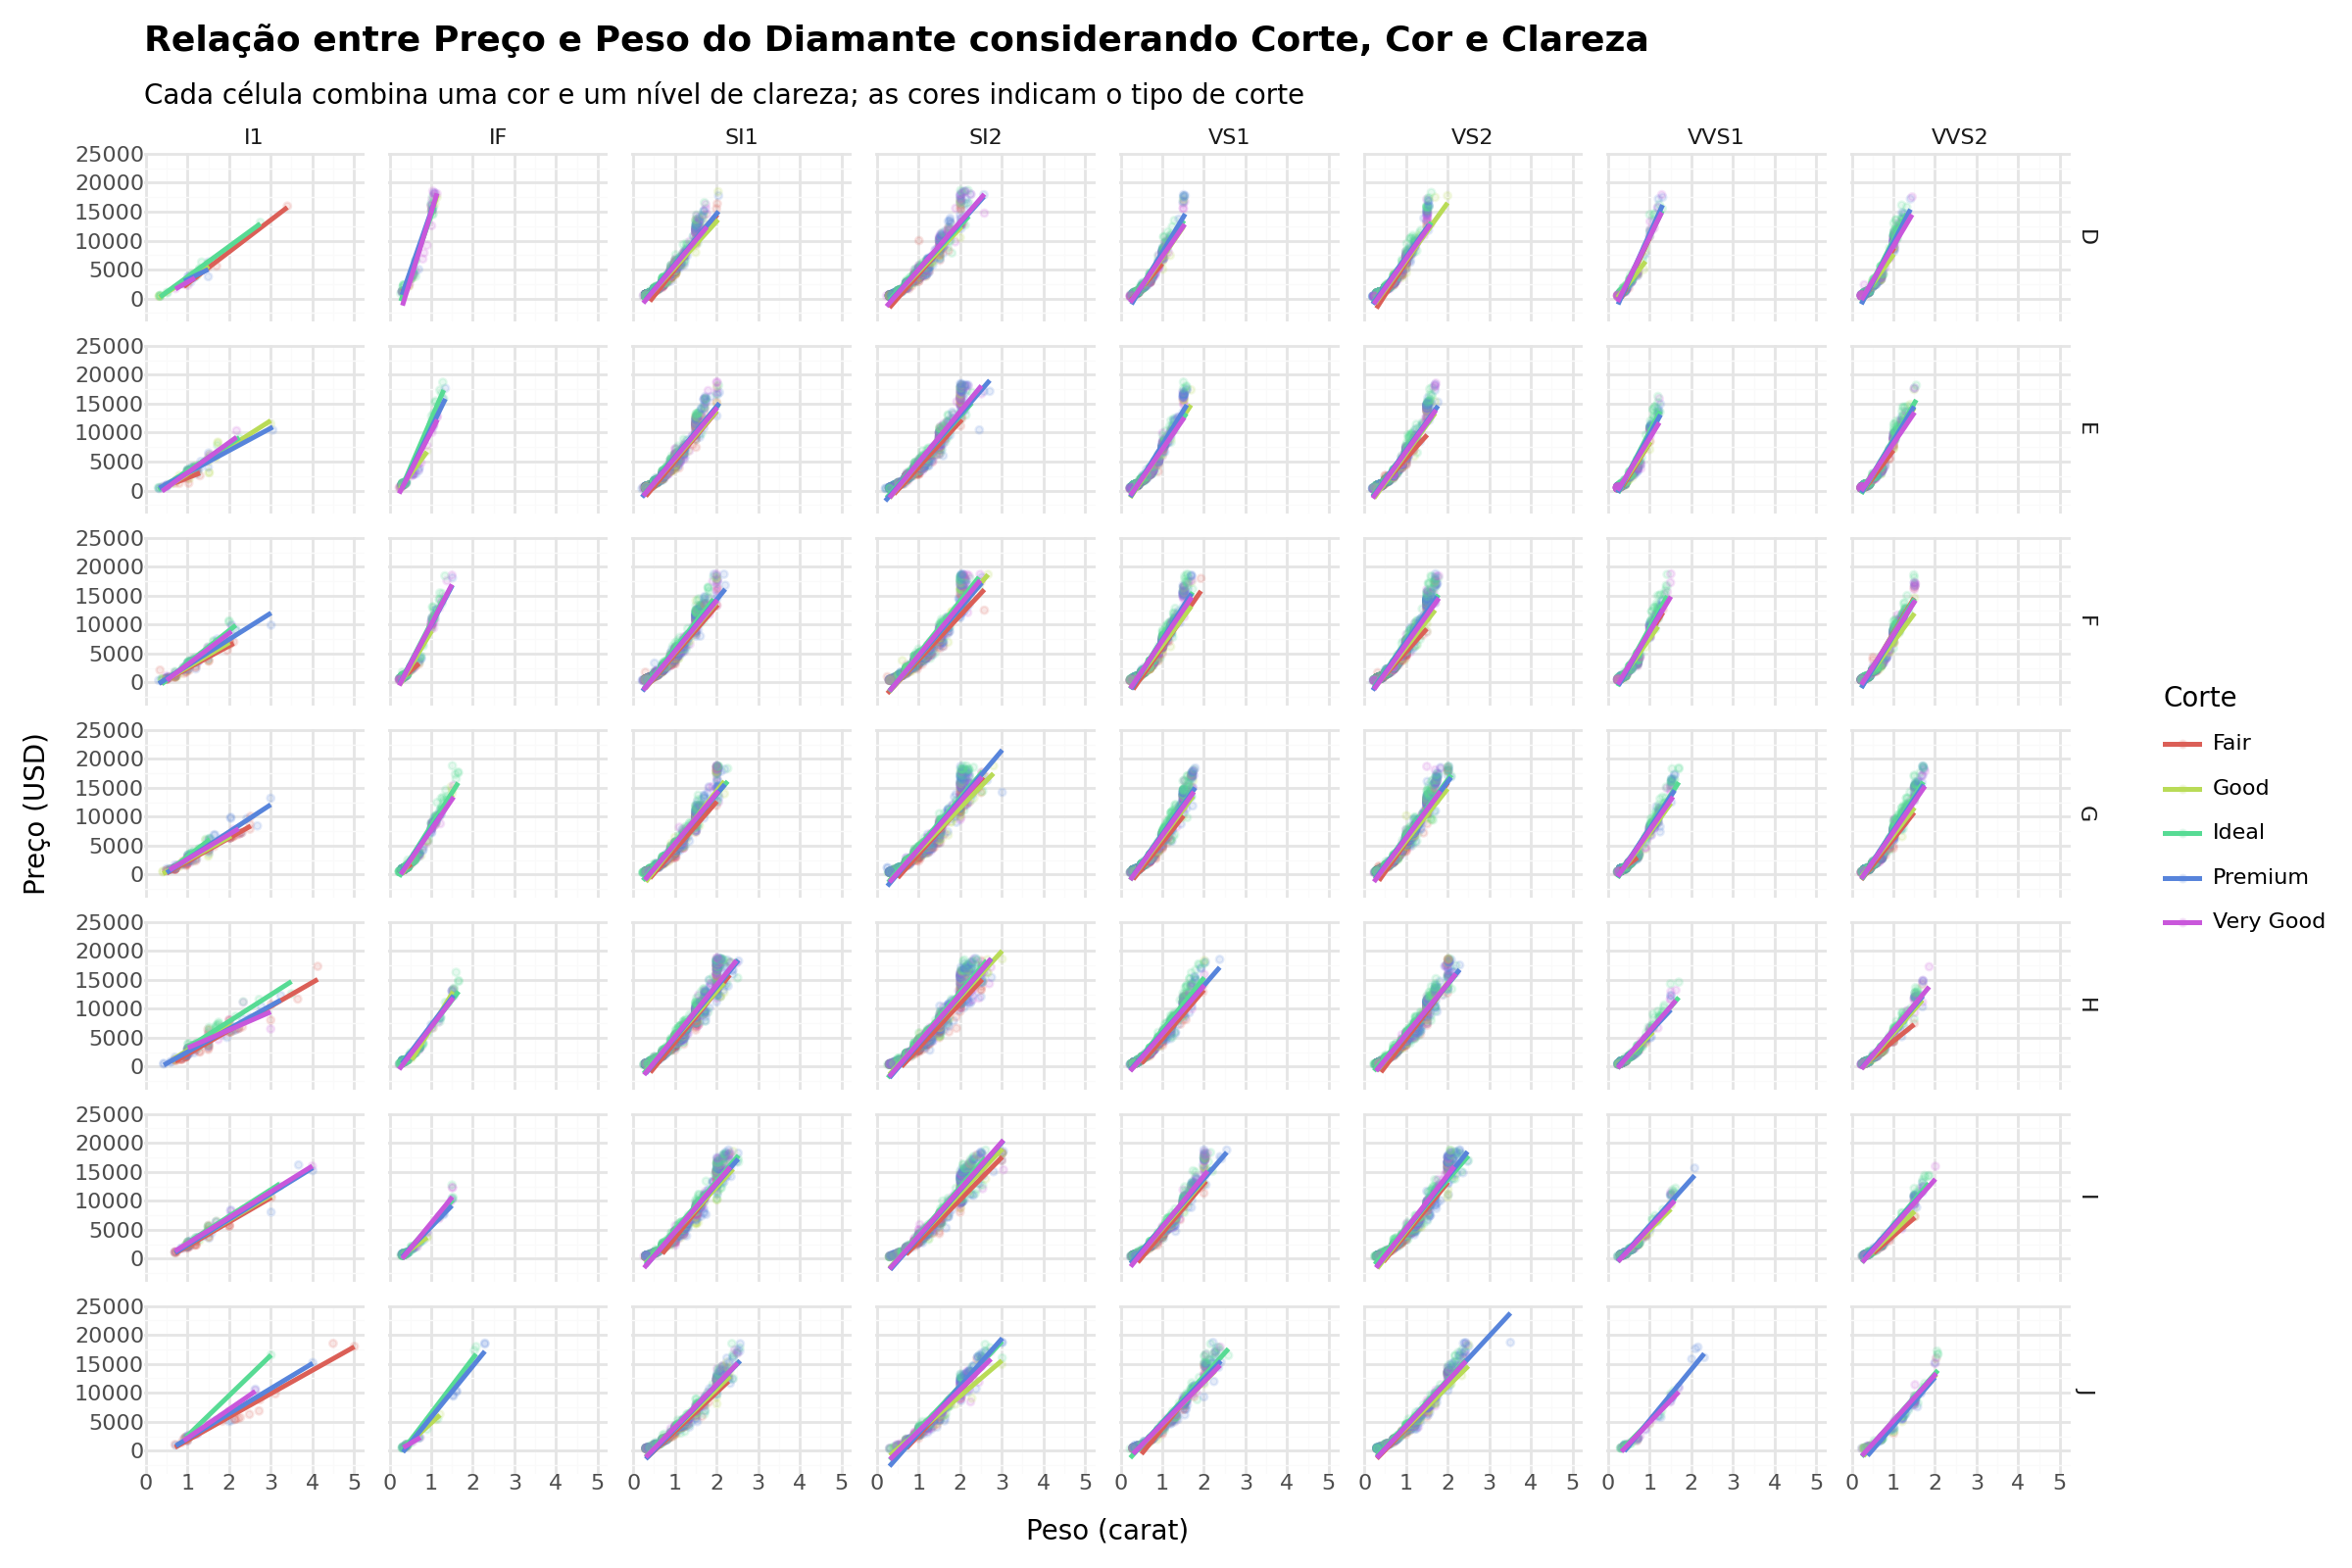

In [24]:
(
    ggplot(diamonds, aes(x='carat', y='price', color='cut')) +
    geom_point(alpha=0.15, size=1) +
    geom_smooth(method='lm', se=False) +
    facet_grid('color ~ clarity') +
    labs(
        title='Relação entre Preço e Peso do Diamante considerando Corte, Cor e Clareza',
        subtitle='Cada célula combina uma cor e um nível de clareza; as cores indicam o tipo de corte',
        x='Peso (carat)',
        y='Preço (USD)',
        color='Corte'
    ) +
    theme_minimal(base_size=10) +
    theme(
        plot_title=element_text(weight='bold', size=13),
        axis_text_x=element_text(rotation=0),
        figure_size=(12, 8)
    )
)


In [25]:
#A maior dificuldade encontrada é a visualização do gráfico, pois devido ao seu tamanho e grande quantidade de dados ficou mais difícil a visualização das linhas em alguns casos.
#A relação positiva entre peso e preço continua evidente em todas as combinações de cor, clareza e corte: diamantes mais pesados tendem a ser mais caros, independentemente da configuração. Contudo, o nível e a inclinação da relação variam bastante.
#Diamantes de corte Ideal ou Premium apresentam preços consistentemente mais altos, mesmo em pesos semelhantes, refletindo a valorização da qualidade do corte.
#Cores próximas de D (melhores) e clarezas como IF e VVS1 também elevam os preços.
#Já diamantes de cor I/J e clareza SI2/I1 mostram uma relação mais dispersa e preços menores.
#Portanto, o peso é o principal determinante do preço, mas o corte, cor e clareza modulam fortemente o valor, afetando tanto a inclinação quanto a variabilidade da relação.

In [26]:
import datetime
import pytz

# Get the current time
now_utc = datetime.datetime.now(datetime.timezone.utc)

# Define the Brasilia timezone
brasilia_timezone = pytz.timezone('America/Sao_Paulo')

# Convert the current time to the Brasilia timezone
now_brasilia = now_utc.astimezone(brasilia_timezone)

# Print the date and time
print("Data e Hora (Brasília):", now_brasilia.strftime('%Y-%m-%d %H:%M:%S %Z%z'))

Data e Hora (Brasília): 2025-10-30 11:16:01 -03-0300
